# Custom OMR Model Training
Based on the colab tutorial on https://roboflow.com/model/yolov4-pytorch

Since everything was set up locally, this starts on [This Step](https://colab.research.google.com/drive/1b08y_nUYv5UtDY211NFfINY7Hy_pgZDt#scrollTo=TvwlqXkSlwUm&line=1&uniqifier=1)
---
We start below with getting the number of classes for training:

In [2]:
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len('train/_classes.txt')

In [3]:
print(num_classes)

8


# Now Let's Train our custom detection model

Pytorch is incredibly finicky with CUDA versions, the version you have on your device may not work with the current torch installed by poetry from a custom source (CUDA 12), make sure the right version of cudnn is install and libnccl as well.

In [29]:
%cp train/_annotations.txt train/train.txt
%cp train/_annotations.txt train.txt
%mkdir data
%cp valid/_annotations.txt data/val.txt
%cp valid/*.jpg train/

In [4]:
import torch
print(torch.cuda.is_available()) # check that everything works

True


In [39]:
#start training
#-b batch size (you should keep this low (2-4) for training to work properly)
#-s number of subdivisions in the batch, this was more relevant for the darknet framework
#-l learning rate
#-g direct training to the GPU device
#pretrained invoke the pretrained weights that we downloaded above
#classes - number of classes
#dir - where the training data is
#epoch - how long to train for
!python ./pytorch-YOLOv4/train.py -b 2 -s 1 -l 0.001 -g 0 -pretrained checkpoints/epoch225_base.pth -classes {num_classes} -dir ./train -epochs 50

log file path:log/log_2024-06-27_20-28-00.txt
2024-06-27 20:28:00,427 train.py[line:435] INFO: Using device cuda
2024-06-27 20:28:01,634 train.py[line:268] INFO: Starting training:
        Epochs:          50
        Batch size:      2
        Subdivisions:    1
        Learning rate:   0.001
        Training size:   60
        Validation size: 6
        Checkpoints:     True
        Device:          cuda
        Images size:     608
        Optimizer:       adam
        Dataset classes: 8
        Train label path:train.txt
        Pretrained:
    
Epoch 1/50:   0%|         | 0/60 [00:00<?, ?img/s]/home/franph/projects/capstone/project-falcon/tasks/OMR-tool/.venv/lib64/python3.12/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Epoch 1/50:  63%|▋| 38/60 [00:10<00:04,  4.41img/s/home/franph/projects/capstone/project-falcon/tasks/OMR-tool/.venv/lib64/python3.12/s

In [18]:
!ls checkpoints
# !mv checkpoints/Yolov4_epoch100.pth checkpoints/epoch100_base.pth
!ls checkpoints

epoch100_base.pth   Yolov4_epoch32.pth	Yolov4_epoch55.pth  Yolov4_epoch78.pth
Yolov4_epoch10.pth  Yolov4_epoch33.pth	Yolov4_epoch56.pth  Yolov4_epoch79.pth
Yolov4_epoch11.pth  Yolov4_epoch34.pth	Yolov4_epoch57.pth  Yolov4_epoch7.pth
Yolov4_epoch12.pth  Yolov4_epoch35.pth	Yolov4_epoch58.pth  Yolov4_epoch80.pth
Yolov4_epoch13.pth  Yolov4_epoch36.pth	Yolov4_epoch59.pth  Yolov4_epoch81.pth
Yolov4_epoch14.pth  Yolov4_epoch37.pth	Yolov4_epoch5.pth   Yolov4_epoch82.pth
Yolov4_epoch15.pth  Yolov4_epoch38.pth	Yolov4_epoch60.pth  Yolov4_epoch83.pth
Yolov4_epoch16.pth  Yolov4_epoch39.pth	Yolov4_epoch61.pth  Yolov4_epoch84.pth
Yolov4_epoch17.pth  Yolov4_epoch3.pth	Yolov4_epoch62.pth  Yolov4_epoch85.pth
Yolov4_epoch18.pth  Yolov4_epoch40.pth	Yolov4_epoch63.pth  Yolov4_epoch86.pth
Yolov4_epoch19.pth  Yolov4_epoch41.pth	Yolov4_epoch64.pth  Yolov4_epoch87.pth
Yolov4_epoch1.pth   Yolov4_epoch42.pth	Yolov4_epoch65.pth  Yolov4_epoch88.pth
Yolov4_epoch20.pth  Yolov4_epoch43.pth	Yolov4_epoch66.pth  Yolov4_

epoch100_base.pth   Yolov4_epoch32.pth	Yolov4_epoch55.pth  Yolov4_epoch78.pth
Yolov4_epoch10.pth  Yolov4_epoch33.pth	Yolov4_epoch56.pth  Yolov4_epoch79.pth
Yolov4_epoch11.pth  Yolov4_epoch34.pth	Yolov4_epoch57.pth  Yolov4_epoch7.pth
Yolov4_epoch12.pth  Yolov4_epoch35.pth	Yolov4_epoch58.pth  Yolov4_epoch80.pth
Yolov4_epoch13.pth  Yolov4_epoch36.pth	Yolov4_epoch59.pth  Yolov4_epoch81.pth
Yolov4_epoch14.pth  Yolov4_epoch37.pth	Yolov4_epoch5.pth   Yolov4_epoch82.pth
Yolov4_epoch15.pth  Yolov4_epoch38.pth	Yolov4_epoch60.pth  Yolov4_epoch83.pth
Yolov4_epoch16.pth  Yolov4_epoch39.pth	Yolov4_epoch61.pth  Yolov4_epoch84.pth
Yolov4_epoch17.pth  Yolov4_epoch3.pth	Yolov4_epoch62.pth  Yolov4_epoch85.pth
Yolov4_epoch18.pth  Yolov4_epoch40.pth	Yolov4_epoch63.pth  Yolov4_epoch86.pth
Yolov4_epoch19.pth  Yolov4_epoch41.pth	Yolov4_epoch64.pth  Yolov4_epoch87.pth
Yolov4_epoch1.pth   Yolov4_epoch42.pth	Yolov4_epoch65.pth  Yolov4_epoch88.pth
Yolov4_epoch20.pth  Yolov4_epoch43.pth	Yolov4_epoch66.pth  Yolov4_

In [40]:
#choose random test image
import os
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);

In [41]:
%%time
##change the epoch here to the one you would like to use for inference
!python ./pytorch-YOLOv4/models.py {num_classes} checkpoints/epoch275_base.pth {img_path} test/_classes.txt

/home/franph/projects/capstone/project-falcon/tasks/OMR-tool/model_training/pytorch-YOLOv4/tool/utils.py:403: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(img.tobytes()))
save plot results to predictions.jpg
CPU times: user 264 ms, sys: 39.1 ms, total: 303 ms
Wall time: 8.03 s


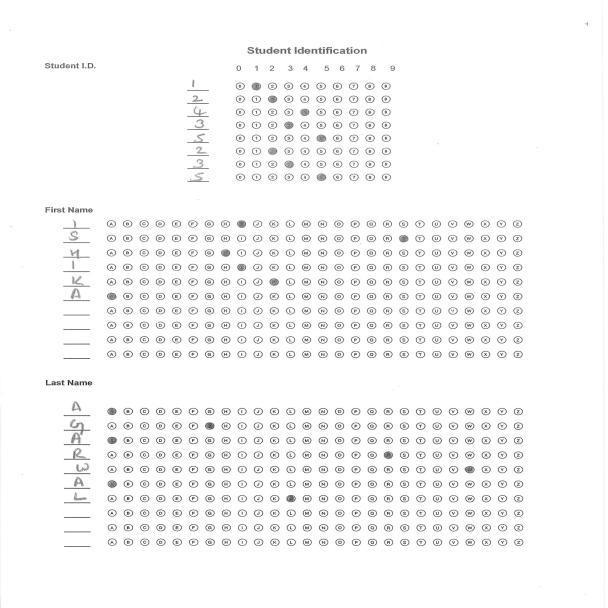

In [42]:
#visualize inference
from IPython.display import Image
Image('predictions.jpg')